#### Summary

Build a model using xgboost with variables such as type, subtype city etc.

In [56]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

#### Get relevant data !

In [59]:
INPUT_DIR = '../input/'
#INPUT_DIR = '../input/competitive-data-science-predict-future-sales/'

In [60]:
sales_train = pd.read_csv(INPUT_DIR + 'sales_train.csv')

In [61]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


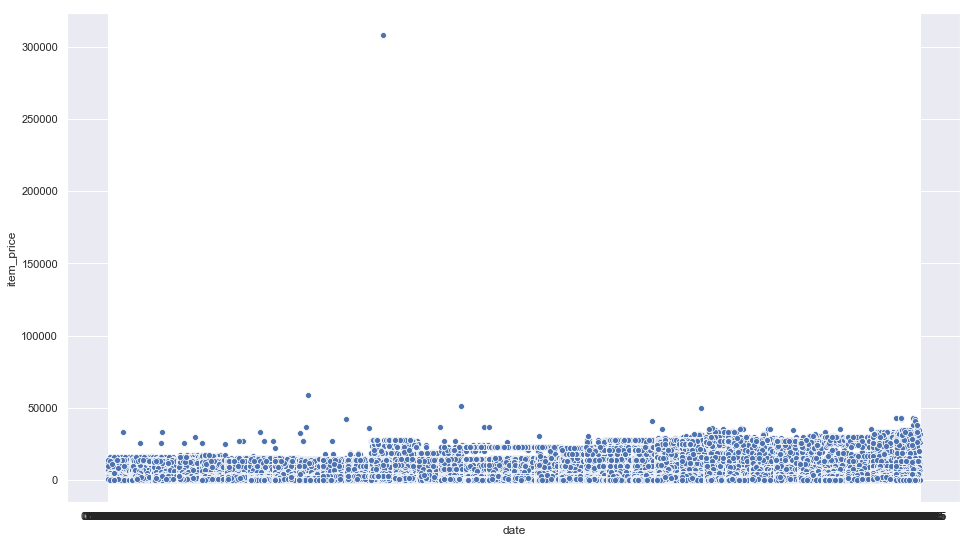

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.scatterplot(x='date',
                y='item_price',
                data=sales_train,
                ax=ax)


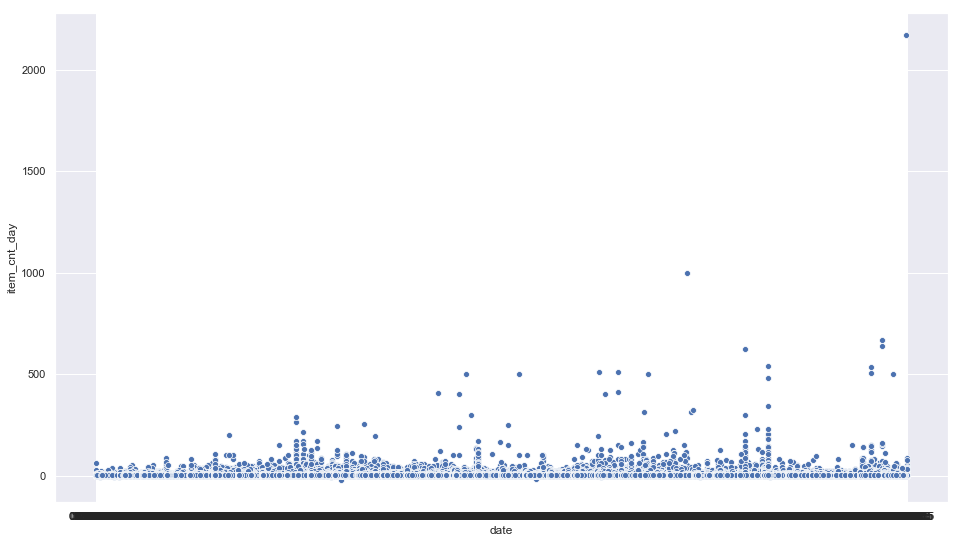

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
sns.scatterplot(x='date',
                y='item_cnt_day',
                data=sales_train,
                ax=ax)


In [37]:
sales_train[sales_train.item_cnt_day > 550]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2326930,15.01.2015,24,12,20949,4.000000,1000.0
2608040,14.04.2015,27,12,3731,1904.548077,624.0
2851091,30.09.2015,32,55,9249,1702.825746,637.0
2864235,30.09.2015,32,12,9248,1692.526158,669.0
2909818,28.10.2015,33,12,11373,0.908714,2169.0


In [38]:
sales_train[sales_train.item_price < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [39]:
sales_train[sales_train.item_price > 50000]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
885138,17.09.2013,8,12,11365,59200.0,1.0
1163158,13.12.2013,11,12,6066,307980.0,1.0
1488135,20.03.2014,14,25,13199,50999.0,1.0


In [40]:
sales_train[sales_train.item_id == 11854]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
31975,04.01.2013,0,2,11854,139.0,1.0
34466,05.01.2013,0,6,11854,138.7,1.0
34467,12.01.2013,0,6,11854,139.3,1.0
64098,12.01.2013,0,30,11854,139.0,1.0
69346,07.01.2013,0,35,11854,139.0,1.0
71608,11.01.2013,0,31,11854,139.0,1.0
71609,03.01.2013,0,31,11854,139.3,1.0
71610,02.01.2013,0,31,11854,199.0,1.0
85162,01.01.2013,0,54,11854,199.0,1.0
85163,03.01.2013,0,54,11854,139.3,1.0


In [62]:
sales_train = sales_train[sales_train.item_cnt_day < 1001]
sales_train = sales_train[sales_train.item_price < 100000]
#  sales_train = sales_train[sales_train.item_id != 11854]

In [63]:
test_data = pd.read_csv(INPUT_DIR + 'test.csv')

In [64]:
len(test_data)

214200

In [66]:
len(test_data.shop_id.unique())

42

In [67]:
len(test_data.item_id.unique())

5100

In [68]:
42*5100

214200

In [73]:
set(test_data.shop_id) - set(sales_train.shop_id)

set()

In [75]:
len(set(test_data.item_id) - set(sales_train.item_id))

363

In [76]:
test_data['shop_id_item_id'] = list(zip(test_data.shop_id, test_data.item_id))

In [77]:
sales_train['shop_id_item_id'] = list(zip(sales_train.shop_id, sales_train.item_id))

In [78]:
len(set(test_data.shop_id_item_id) - set(sales_train.shop_id_item_id))

102796

In [79]:
len(set(test_data.shop_id_item_id))

214200

#### Aggregate to get monthly stats

In [ ]:
monthly_stats_data = sales_train[['date_block_num', 'shop_id', 'item_id', 'item_cnt_day']].groupby(
    ['date_block_num', 'shop_id', 'item_id']).sum()
monthly_stats_data.rename(columns={'item_cnt_day' : 'item_cnt_month'}, inplace=True)
monthly_stats_data.reset_index(inplace=True)

In [ ]:
monthly_stats_data['date_block_num_shop_id_item_id'] = list(zip(monthly_stats_data.date_block_num, 
                                                                monthly_stats_data.shop_id,
                                                                monthly_stats_data.item_id))

#### Get shops data

In [41]:
shops = pd.read_csv(INPUT_DIR + 'shops.csv')

In [46]:
shops[(shops.shop_id == 0) | (shops.shop_id == 57)]

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
57,"Якутск Орджоникидзе, 56",57


In [52]:
shops.loc[(shops.shop_id ==0), 'shop_id'] = 57

In [55]:
shops[(shops.shop_id == 1) | (shops.shop_id == 58)]

,shop_name,shop_id
1,"!Якутск ТЦ ""Центральный"" фран",58
58,"Якутск ТЦ ""Центральный""",58


In [54]:
shops.loc[(shops.shop_id ==1), 'shop_id'] = 58

In [48]:
shops[(shops.shop_id == 11) | (shops.shop_id == 10)]

,shop_name,shop_id
10,Жуковский ул. Чкалова 39м?,10
11,Жуковский ул. Чкалова 39м²,11


In [53]:
shops.loc[(shops.shop_id ==10), 'shop_id'] = 11

In [ ]:
shops.head()

In [ ]:
shops['shop_name'].apply(lambda x : x.split()[0]).unique()


In [ ]:
### Make the city numeric
shops['city'] = shops['shop_name'].apply(lambda x : x.split()[0])
shops['city_id'] = LabelEncoder().fit_transform(shops['city'])

In [ ]:
shops['city_id'].unique()

In [ ]:
shop_id_city_id = dict(zip(shops.shop_id, shops.city_id))

#### Get item categories data

In [ ]:
items = pd.read_csv(INPUT_DIR + 'items.csv')

In [ ]:
items.head()

In [ ]:
item_id_to_item_category_id = dict(zip(items.item_id, items.item_category_id))

In [ ]:
item_categories = pd.read_csv(INPUT_DIR + 'item_categories.csv')

In [ ]:
item_categories.head()

In [ ]:
item_categories['item_category_name'].apply(lambda x : x.split('-')[0]).unique()

In [ ]:
item_categories['item_category_name'].apply(lambda x : x.split('-')[0]).unique()

In [ ]:
item_categories['item_category_name'].apply(lambda x : x.split('-')[0]).unique()

In [ ]:
item_categories['item_category_name'].unique()

In [ ]:
item_categories['cat_split']  = item_categories['item_category_name'].apply(lambda x : x.split('-'))

In [ ]:
item_categories['type'] = item_categories['cat_split'].apply(lambda x : x[0])

In [ ]:
item_categories['sub_type'] = item_categories['cat_split'].apply(lambda x : x[1] if len(x) > 1 else x[0])

In [ ]:
item_categories.type.unique()

In [ ]:
item_categories.sub_type.unique()

In [ ]:
item_categories['type_id'] = LabelEncoder().fit_transform(item_categories['type'])
item_categories['sub_type_id'] = LabelEncoder().fit_transform(item_categories['sub_type'])

In [ ]:
item_categories.head()

In [ ]:
item_category_id_to_type_id = dict(zip(item_categories.item_category_id, item_categories.type_id))
item_category_id_to_sub_type_id = dict(zip(item_categories.item_category_id, item_categories.sub_type_id))

#### Add item category id, city id, type id and sub type id to the main dataframe

In [ ]:
monthly_stats_data['item_category_id'] = monthly_stats_data['item_id'].apply(
    lambda x : item_id_to_item_category_id.get(x, -1))
monthly_stats_data['city_id'] = monthly_stats_data['shop_id'].apply(
    lambda x : shop_id_city_id.get(x, -1))
monthly_stats_data['type_id'] = monthly_stats_data['item_category_id'].apply(
    lambda x : item_category_id_to_type_id.get(x, -1))
monthly_stats_data['sub_type_id'] = monthly_stats_data['item_category_id'].apply(
    lambda x : item_category_id_to_sub_type_id.get(x, -1))

#### Add the most recent item_cnt_month value which is a very important predictor

In [ ]:
monthly_stats_data['shop_id_item_id_date_block_num'] = list(zip(monthly_stats_data.shop_id,
                                                                monthly_stats_data.item_id,
                                                                monthly_stats_data.date_block_num))

In [ ]:
shop_id_item_id_date_block_num_to_item_cnt_month = dict(zip(monthly_stats_data.shop_id_item_id_date_block_num,
                                                            monthly_stats_data.date_block_num))

In [ ]:
def get_most_recent_item_cnt_month(shop_id, item_id, date_block_num):
    val = 0
    for i in range(date_block_num, -1, -1):
        if (shop_id, item_id, i) in shop_id_item_id_date_block_num_to_item_cnt_month.keys():
            val = shop_id_item_id_date_block_num_to_item_cnt_month.get((shop_id, item_id, i))
            break
            
    return val

In [ ]:
monthly_stats_data['most_recent_item_cnt_month'] = monthly_stats_data.apply(
    lambda x : get_most_recent_item_cnt_month(x.shop_id, x.item_id, x.date_block_num-1), axis=1)

#### Build the xgboost model.

In [ ]:
def build_xgboost_model(X, Y, new_X, new_Y, X_COLUMNS):
    xgb_train_data = xgb.DMatrix(X, Y, feature_names=X_COLUMNS)
    xgb_validation_data = xgb.DMatrix(new_X, new_Y, feature_names=X_COLUMNS)
    xgb_params = {'eta' : 0.1, 'eval_metric' : 'rmse'}
    model_obj = xgb.train(params=xgb_params,
                          dtrain=xgb_train_data,
                          num_boost_round=4000)
    validation_predictions = model_obj.predict(xgb_validation_data) 
    print(np.sqrt(mean_squared_error(np.clip(validation_predictions, 0, 20), np.clip(new_Y, 0, 20))))

In [ ]:
monthly_stats_data.columns

In [ ]:
train_data = monthly_stats_data[(monthly_stats_data.date_block_num !=32) &(monthly_stats_data.date_block_num !=33)]
validation_data = monthly_stats_data[(monthly_stats_data.date_block_num ==32)]
test_data = monthly_stats_data[(monthly_stats_data.date_block_num ==33)]

In [ ]:
X_COLUMNS = ['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'most_recent_item_cnt_month']
Y_COLUMN = 'item_cnt_month'
X = train_data[X_COLUMNS]
Y = train_data[[Y_COLUMN]]
new_X = validation_data[X_COLUMNS]
new_Y = validation_data[[Y_COLUMN]]
build_xgboost_model(X, Y, new_X, new_Y, X_COLUMNS)

In [ ]:
X_COLUMNS = ['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'most_recent_item_cnt_month', 'city_id']
Y_COLUMN = 'item_cnt_month'
X = train_data[X_COLUMNS]
Y = train_data[[Y_COLUMN]]
new_X = validation_data[X_COLUMNS]
new_Y = validation_data[[Y_COLUMN]]
build_xgboost_model(X, Y, new_X, new_Y, X_COLUMNS)

In [ ]:
X_COLUMNS = ['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'most_recent_item_cnt_month', 
             'city_id', 'type_id']
Y_COLUMN = 'item_cnt_month'
X = train_data[X_COLUMNS]
Y = train_data[[Y_COLUMN]]
new_X = validation_data[X_COLUMNS]
new_Y = validation_data[[Y_COLUMN]]
build_xgboost_model(X, Y, new_X, new_Y, X_COLUMNS)

In [ ]:
X_COLUMNS = ['date_block_num', 'shop_id', 'item_id', 'item_category_id', 'most_recent_item_cnt_month', 
             'city_id', 'type_id', 'sub_type_id']
Y_COLUMN = 'item_cnt_month'
X = train_data[X_COLUMNS]
Y = train_data[[Y_COLUMN]]
new_X = validation_data[X_COLUMNS]
new_Y = validation_data[[Y_COLUMN]]
build_xgboost_model(X, Y, new_X, new_Y, X_COLUMNS)